In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("train.csv")
# fig = plt.Figure(figsize=(25, 10), dpi= 80,facecolor='w', edgecolor='k')

<h1>Analysis below</h1>

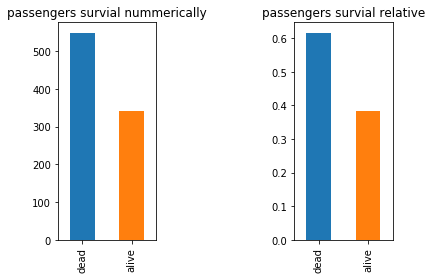

In [100]:
#check the the survival of the passengers
plt.subplot2grid((1,3),(0,0))
df.Survived.value_counts().plot(kind="bar")
plt.xticks([1,0],["alive","dead"])
plt.title("passengers survial nummerically")
plt.subplot2grid((1,3),(0,2))
#check the the survival of the passengers as percentage
df.Survived.value_counts(normalize=True ).plot(kind="bar")
plt.title("passengers survial relative")
plt.xticks([1,0],["alive","dead"])
plt.show()

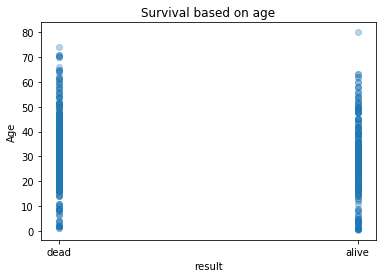

In [69]:
# age to survival 
plt.scatter(df.Survived,df.Age,alpha=.3)
plt.xticks([1,0],["alive","dead"])
plt.ylabel("Age")
plt.xlabel("result")
plt.title("Survival based on age")
plt.show()
plt.clf()

Text(0.5,1,"Passanger's class")

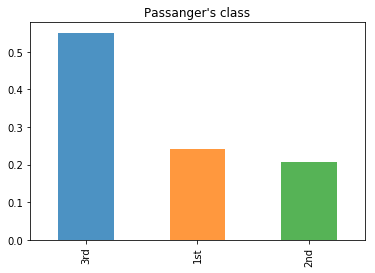

In [76]:
df.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=.8)
plt.xticks([0,1,2],["3rd","1st","2nd"])
plt.title("Passanger's class")

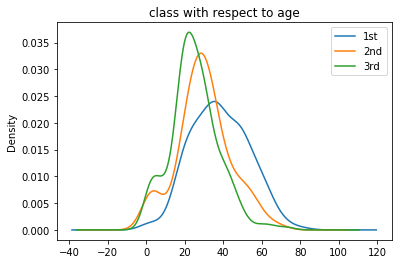

In [77]:
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("class with respect to age")
plt.legend(("1st","2nd","3rd"))
plt.show()
plt.clf()


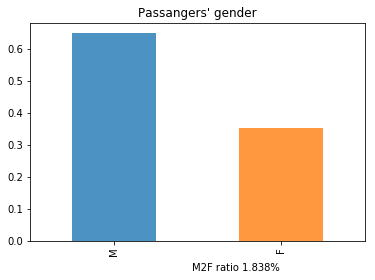

In [120]:
# sex data minified
df.Sex=df.Sex.map(lambda a:a[0].upper())
sex_count_data=df.Sex.value_counts(normalize=True)
sex_count_data.plot(kind="bar",alpha=.8)
plt.title("Passangers' gender")
plt.figtext(.5, .02, "M2F ratio {:.3f}%".format(sex_count_data[0]/sex_count_data[1]))
plt.show()

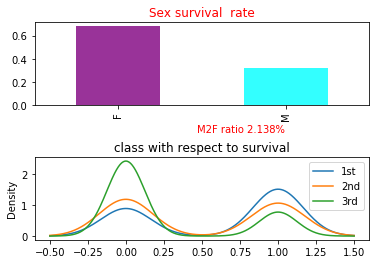

In [162]:
# sex survival 
plt.subplot2grid((5,4),(0,0),colspan=5,rowspan=2)
sex_count_data=df.Sex[df.Survived==True].value_counts(normalize=True)
sex_count_data.plot(kind="bar",alpha=.8,color=["purple",'cyan'])
plt.title("Sex survival  rate", color="red")
plt.figtext(.5, .5, "M2F ratio {:.3f}%".format(sex_count_data[0]/sex_count_data[1]),color="red")
# class survival 
plt.subplot2grid((5,4),(3,0),colspan=5,rowspan=2)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Class with respect to survival")
plt.legend(("1st","2nd","3rd"))
plt.show()

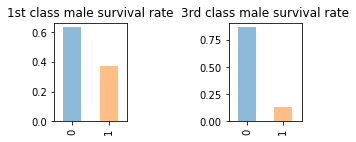

In [166]:
#  rich men survival
plt.subplot2grid((2,4), (1,0))
df.Survived[(df.Sex == "M") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("1st class male survival rate")

#  poor men survival
plt.subplot2grid((2,4), (1,2))
df.Survived[(df.Sex == "M") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("3rd class male survival rate")
plt.show()

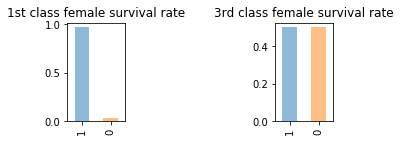

In [172]:
#  rich women survival
plt.subplot2grid((2,5), (1,0))
df.Survived[(df.Sex == "F") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("1st class female survival rate")

#  poor women survival
plt.subplot2grid((2,5), (1,3))
df.Survived[(df.Sex == "F") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("3rd class female survival rate")
plt.show()